# Python Seaborn Tutorial for Beginners

## What is Seaborn?

- Python Data Visualization Library - based on MatPlotLib (see previous tutorials)
- Used for plotting statistical graphs, identifying trends, relationships & outliers
- In my opinion, Seaborn is easier & faster to use (less code) Vs MatPlotLib

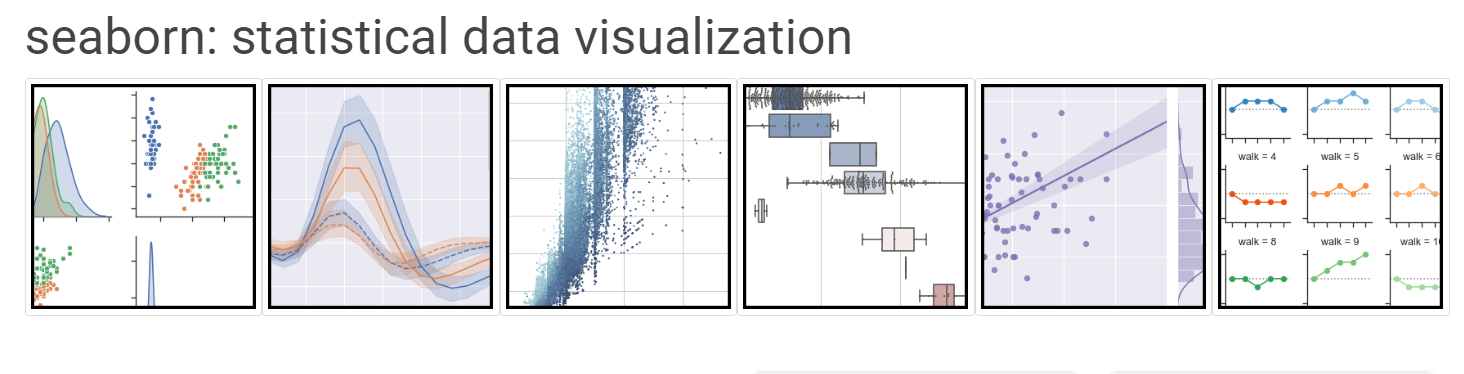

In [1]:
# Visual representation of Seaborn

import os
from IPython.display import Image
PATH = "F:\\Github\\Python tutorials\\Introduction to Seaborn\\"
Image(filename = PATH + "Seaborn.png", width=900, height=900)

## Tutorial Overview

- What is matplotlib and how/why it's used


- Trend Plots:
    - Line Plots
    
    
- Summary Plots:
    - Bar Plots
    
    
- Distribution of Data:
    - Histogram
    - Box Plots
    
    
- Relationship Plots
    - Scatter Plots
    - lmplot (combo of regplot() and FacetGrid)
    
    
- Holistic views / Combo:
    - Sub Plots
    - Pair Plots
    - Join Plots
    
    
- Correlation / Relationships:
    - Heat Maps

## Tutorial Overview by video


### Video 1:
1. What is matplotlib and how/why it's used
2. Line Plots
3. Bar Plots
4. Histogram

### Video 2:
5. Box Plots
6. Scatter Plots
7. lmplot (combo of regplot() and FacetGrid)

### Video 3:
8. Sub Plots
9. Pair Plots
10. Join Plots
11. Heat Maps

## Importing / Installing packages



In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To install seaborn type "pip install seaborn" to the anaconda terminal

# import sys
# !conda list Check the packages installed


## 1. Loading the Raw Data


In [3]:
# Loading the data

raw_data = pd.read_csv("F:\\Github\Python tutorials\\Introduction to Seaborn\\Marketing Raw Data.csv")
# runs all the data
raw_data

print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(182, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


## 2. Line Gragh

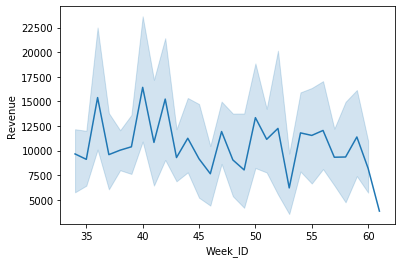

In [4]:
# Example 1 - Simple 1 line graph
# Assuming we want to investigate the Revenue by Date

ax = sns.lineplot(x='Week_ID', y='Revenue', data = raw_data)

# Notes: error bands show the confidence interval

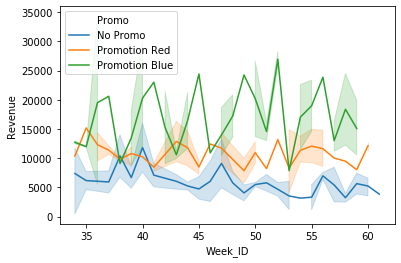

In [5]:
# Example 2 - Adding Categories

# By Promo
ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', data = raw_data)


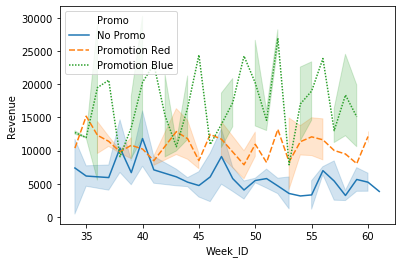

In [6]:
# Example 3 - By Promo with style
ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data)

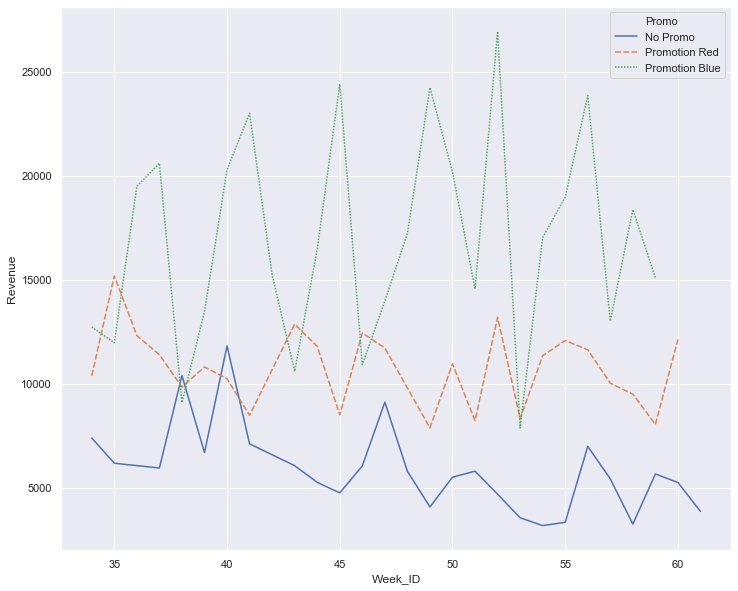

In [7]:
# Example 4 - By Promo with style & Increase the size & Remove error bars

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data, ci=None)

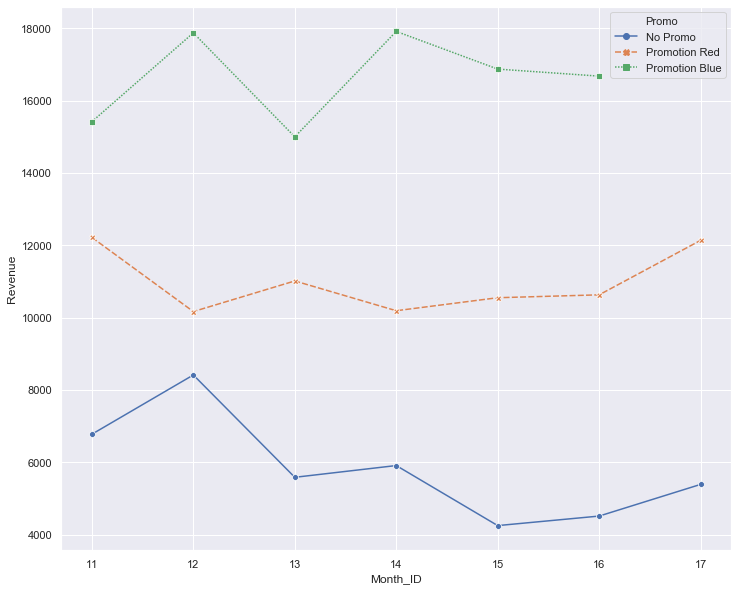

In [8]:
# Example 5 - By Promo with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Month_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data, ci=None,  markers=True)

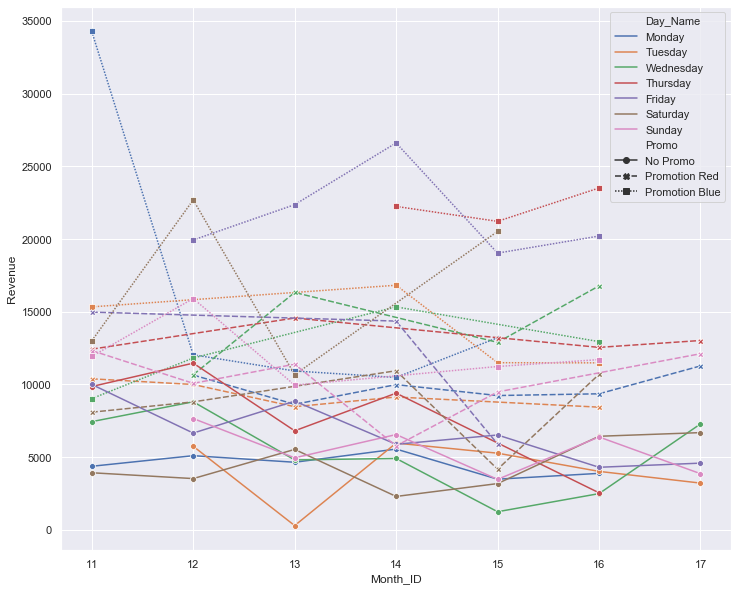

In [9]:
# Example 6 - By Day_Name with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Month_ID', y='Revenue', hue = 'Day_Name', style = 'Promo', data = raw_data, ci=None,  markers=True)

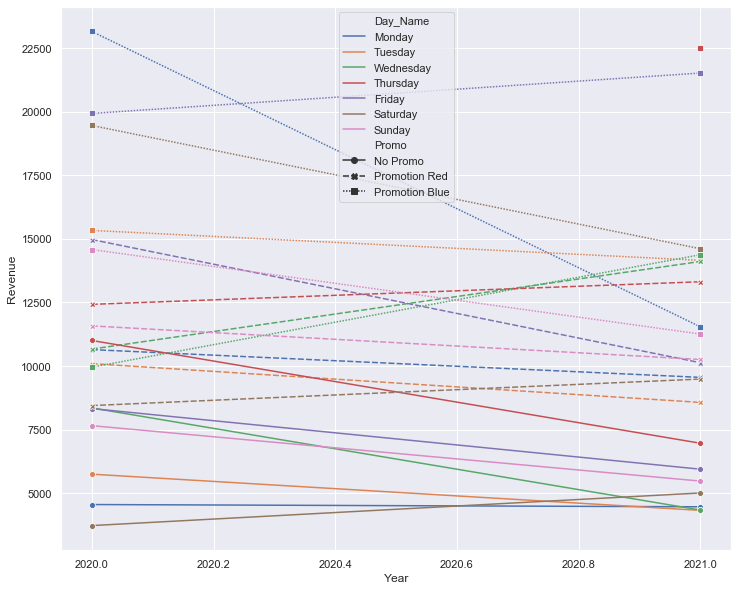

In [10]:
# Example 7 - By Year with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Year', y='Revenue', hue = 'Day_Name', style = 'Promo', data = raw_data, ci=None,  markers=True)

### LinePlot Documentation
https://seaborn.pydata.org/generated/seaborn.lineplot.html 

## 3. Bar Plots

,Month_ID,Revenue
0,11,11255.454545
1,12,11667.806452
2,13,9588.516129
3,14,10683.892857
4,15,10555.354839
5,16,10806.500000
6,17,7636.000000


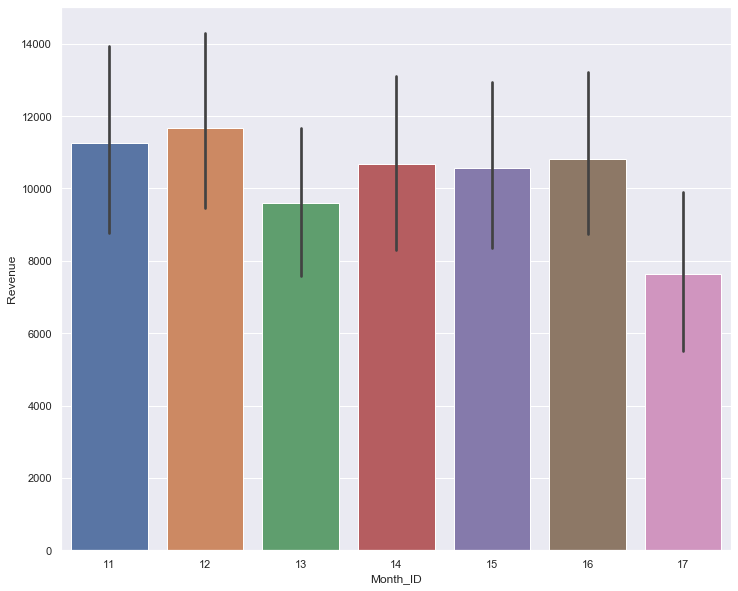

In [11]:
# Example 1 - Total Revenue by Month

ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data)

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['Month_ID', 'Revenue']].groupby('Month_ID', as_index = False).agg({'Revenue':'mean'})

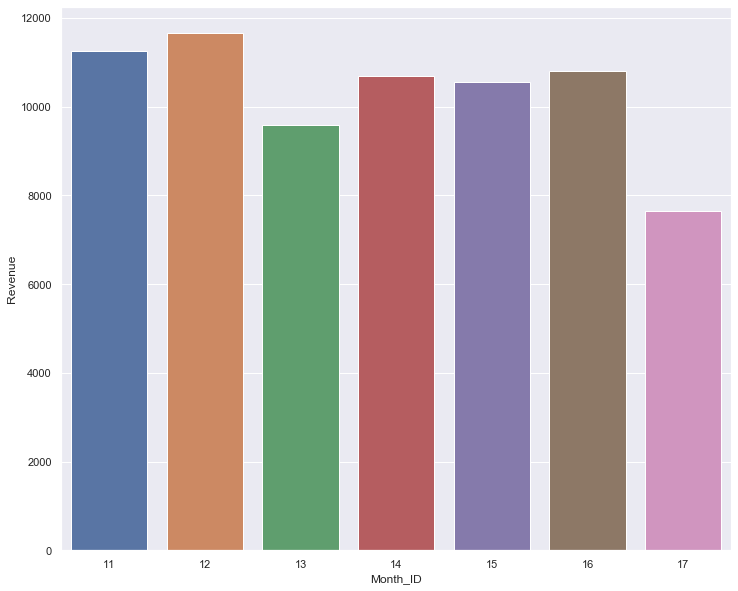

In [12]:
# Example 2 - Total Revenue by Month - Remove the Confidence Interval
ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data, ci=False)

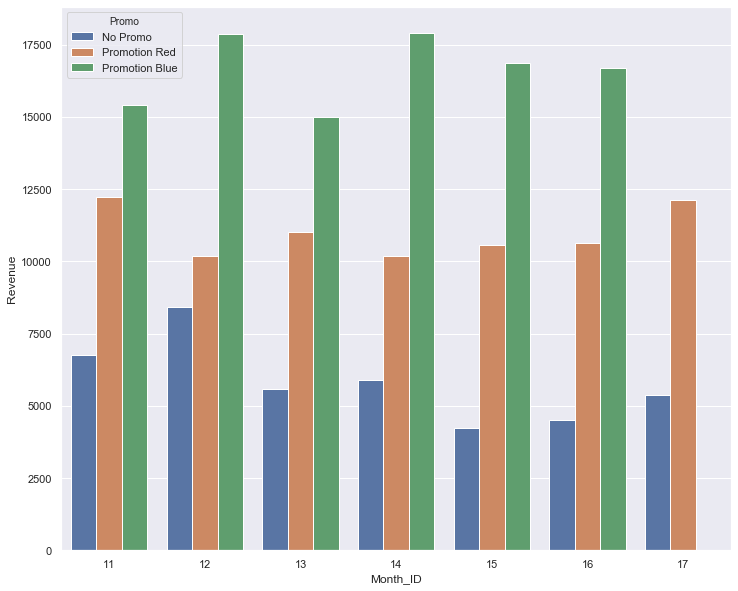

In [13]:
# Example 3 - Total Revenue by Month - Remove the Confidence Interval - By Promo
ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data, ci=False, hue = 'Promo')

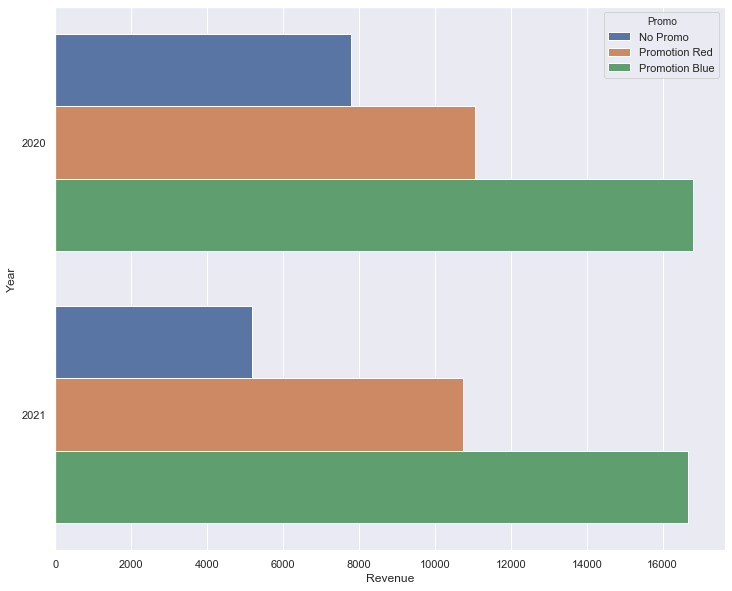

In [14]:
# Example 4 - Total Revenue by Month - Remove the Confidence Interval - By Promo - Changing direction
ax = sns.barplot(x="Revenue", y="Year", ci=False, hue = 'Promo', orient = 'h', data=raw_data)


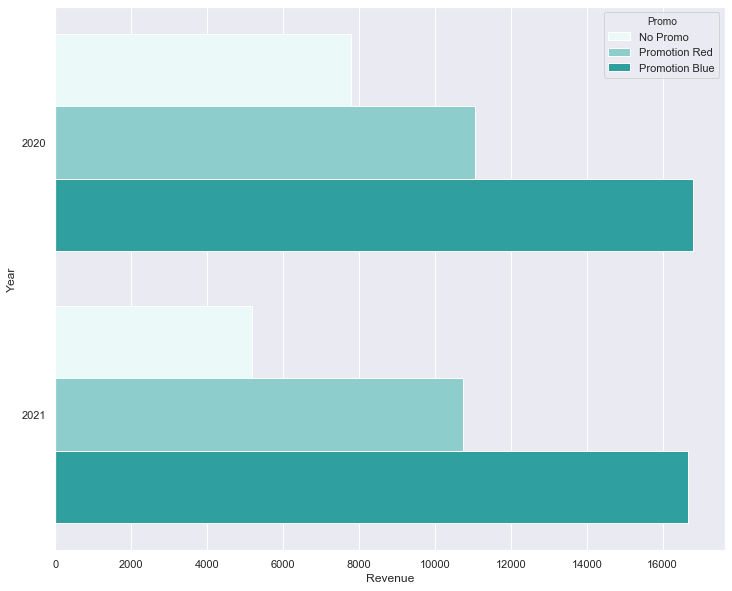

In [15]:
# Example 5 - Total Revenue by Month - Remove the Confidence Interval - By Promo - Changing direction - Changing Colour
ax = sns.barplot(x="Revenue", y="Year", ci=False, hue = 'Promo', orient = 'h', data=raw_data, color="#1CB3B1")

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/


## 4. Histograms

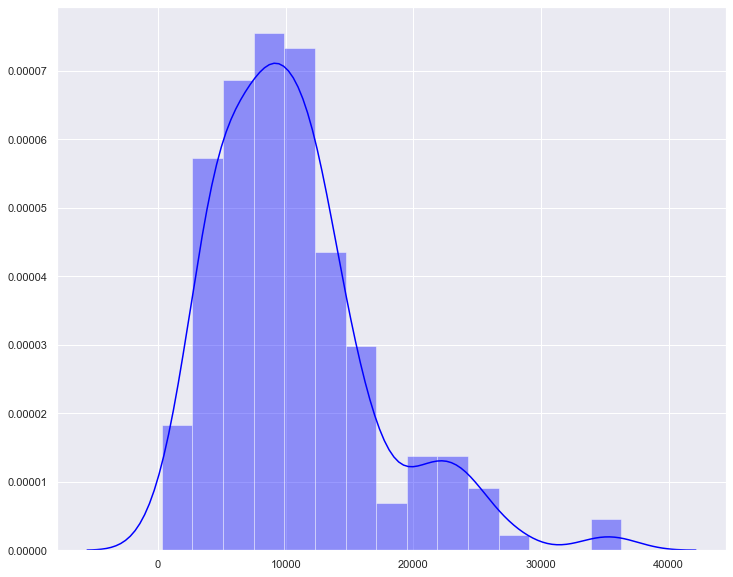

In [16]:
# Example 1 - Investigating the distribution of Revenue

x = raw_data['Revenue'].values

sns.distplot(x, color = 'blue');

# As you can see, it's a bit imbalance. Right skewd distribution as the mean is to the right

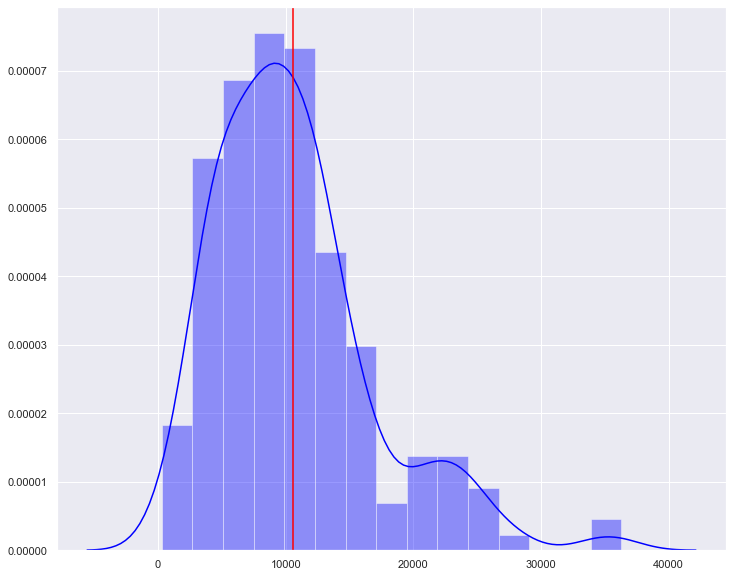

In [17]:
# Example 2 - Investigating the distribution of Revenue, adding the mean

x = raw_data['Revenue'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['Revenue'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

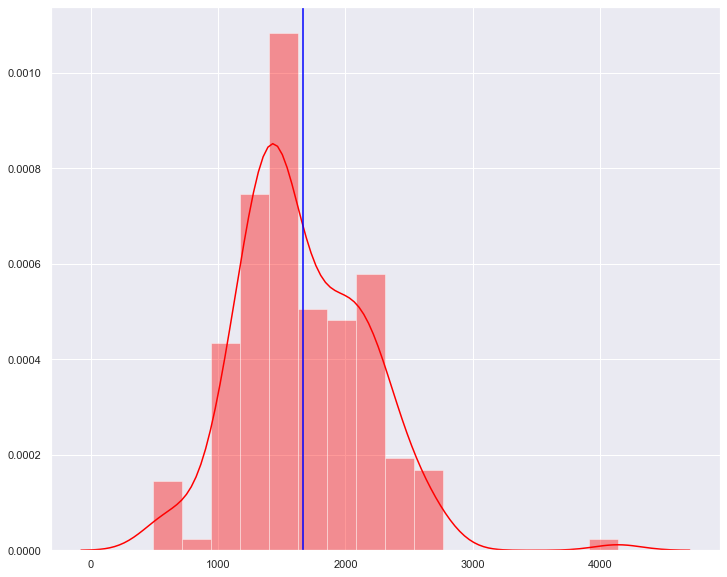

In [18]:
# Example 3 - Investigating the distribution of Visitors, adding the mean

x = raw_data['Visitors'].values

sns.distplot(x, color = 'red');

# Calculating the mean
mean = raw_data['Visitors'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'blue')

## 5. Box Plots

The meadian is:  9452.0


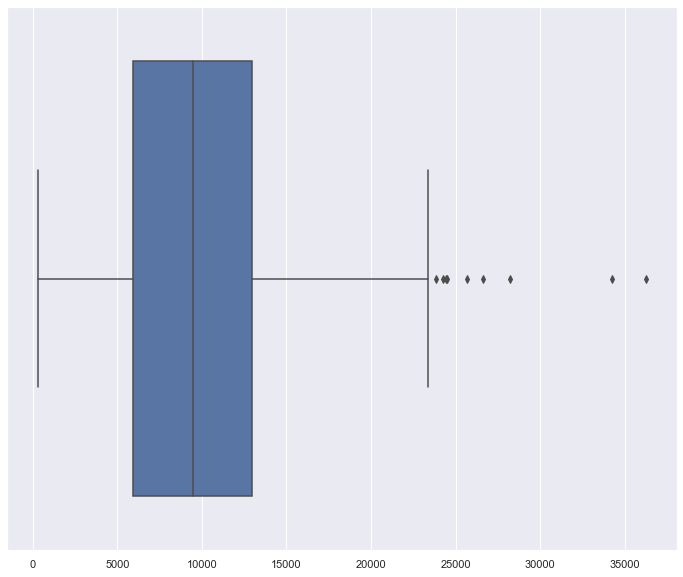

In [19]:
# Example 1 - Investigating the distribution of Revenue

x = raw_data['Revenue'].values

ax = sns.boxplot(x)

print('The meadian is: ', raw_data['Revenue'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

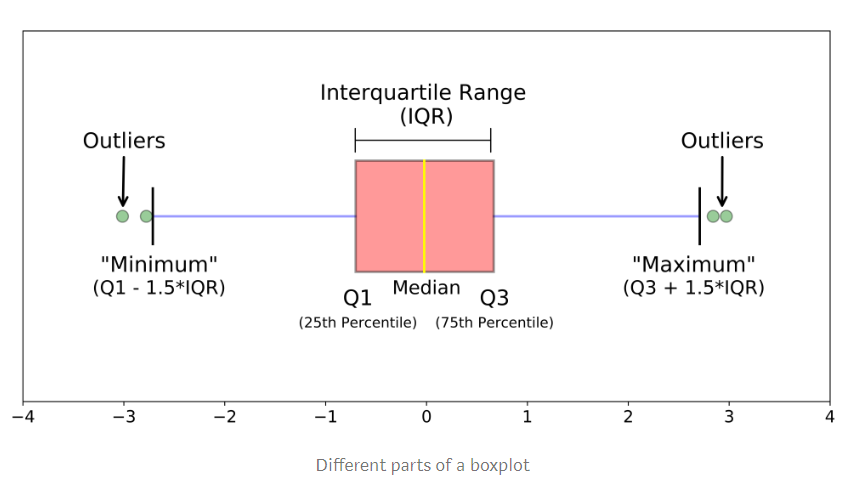

In [20]:
# More Details

PATH = "F:\\Github\\Python tutorials\\Introduction to Seaborn\\"
Image(filename = PATH + "Seaborn boxplot.png", width=900, height=900)

# More details here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
# Credits: Michael Galarnyk


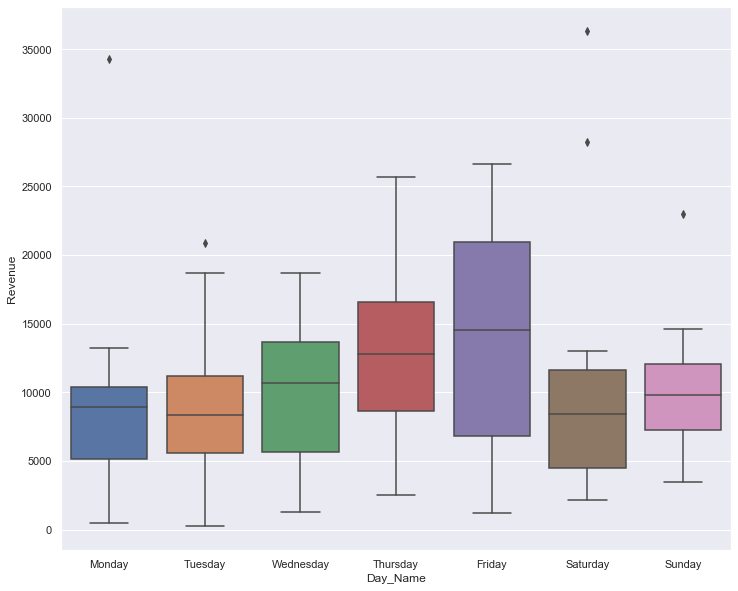

In [21]:
# Example 2 - Investigating the distribution of Revenue by Day

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data)

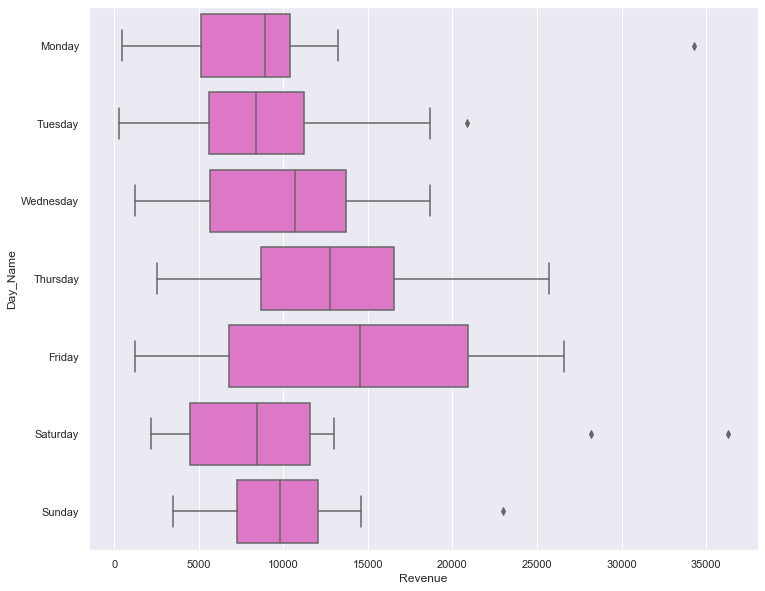

In [22]:
# Example 3 - Investigating the distribution of Revenue by Day - Horizontal - change color

ax = sns.boxplot(x="Revenue", y="Day_Name", data=raw_data, color = '#EE67CF')

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

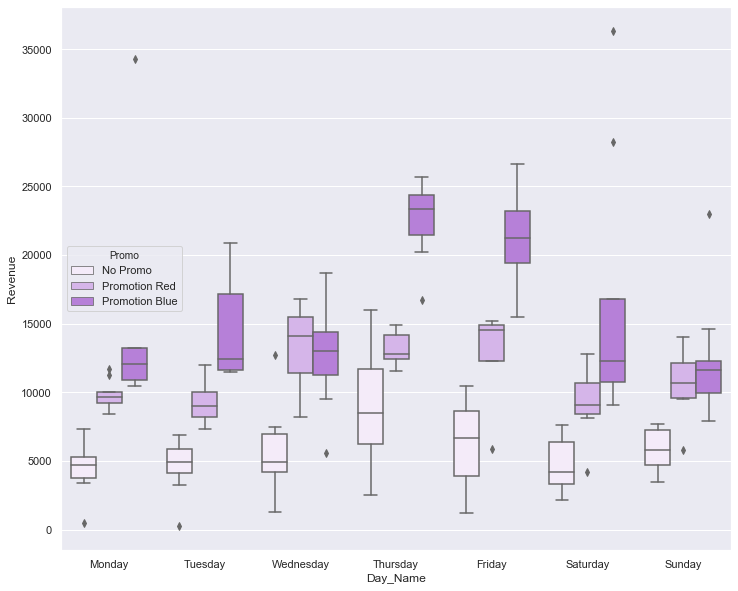

In [23]:
# Example 4 - Investigating the distribution of Revenue by Day - changing color - adding hue

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data, color="#B971E7", hue = 'Promo')

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

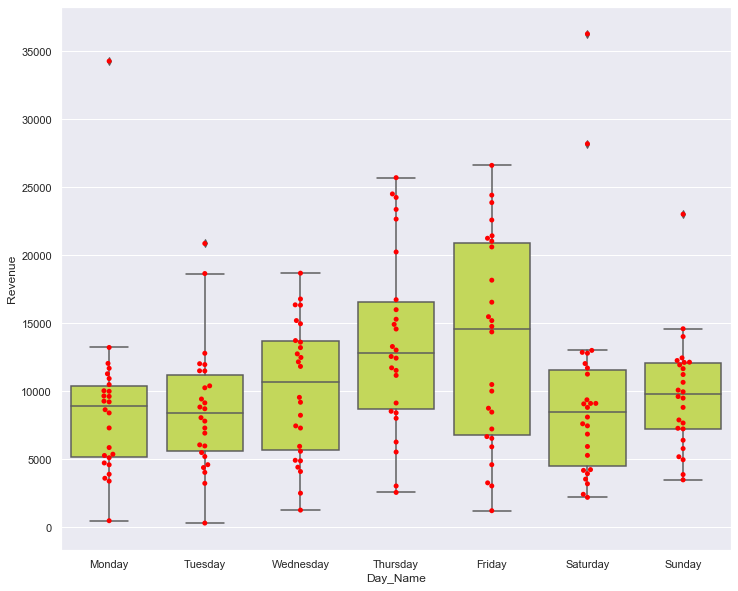

In [24]:
# Example 5 - Investigating the distribution of Revenue by Day - by color - by data points

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data, color = '#D1EC46')
ax = sns.swarmplot(x="Day_Name", y="Revenue", data=raw_data, color="red")

### More on Boxplots here:
https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

## 6. ScatterPlots

In [25]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

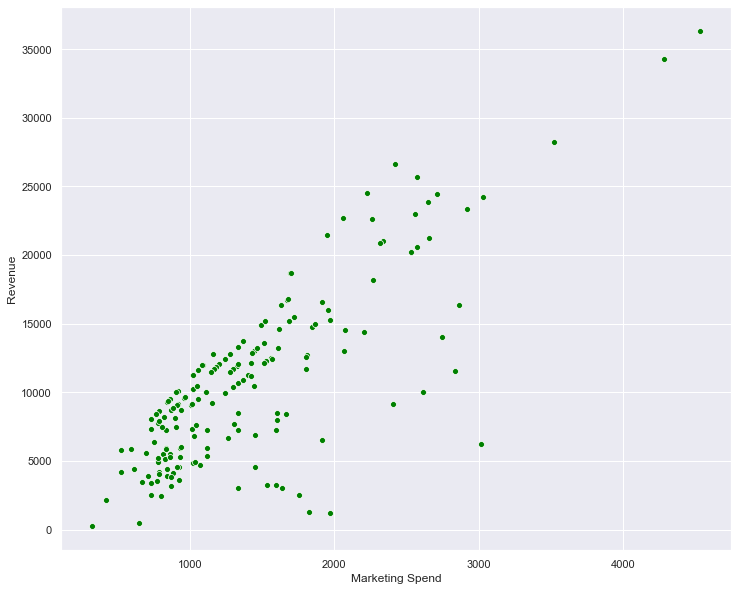

In [48]:
# Example 1 - Relationship between Marketing Spend and Revenue

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green')

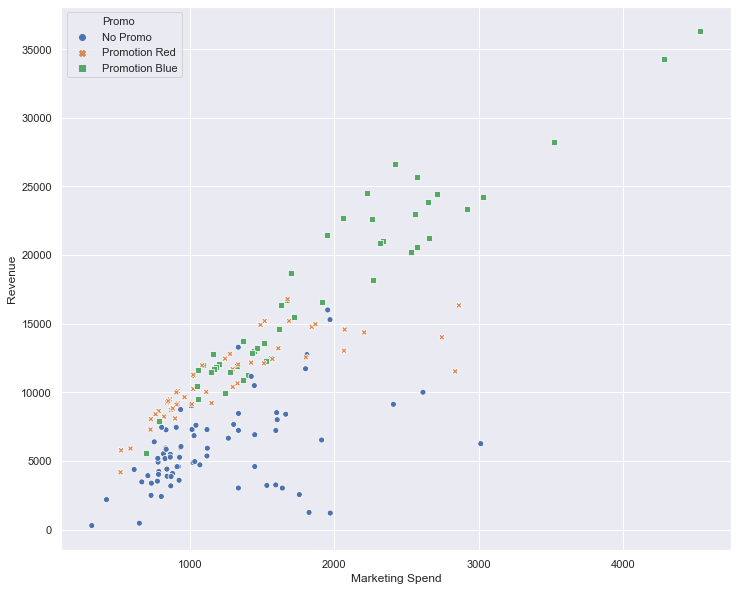

In [27]:
# Example 2 - Relationship between Marketing Spend and Revenue - changing color, hue & Style

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green', hue = 'Promo', style = 'Promo')

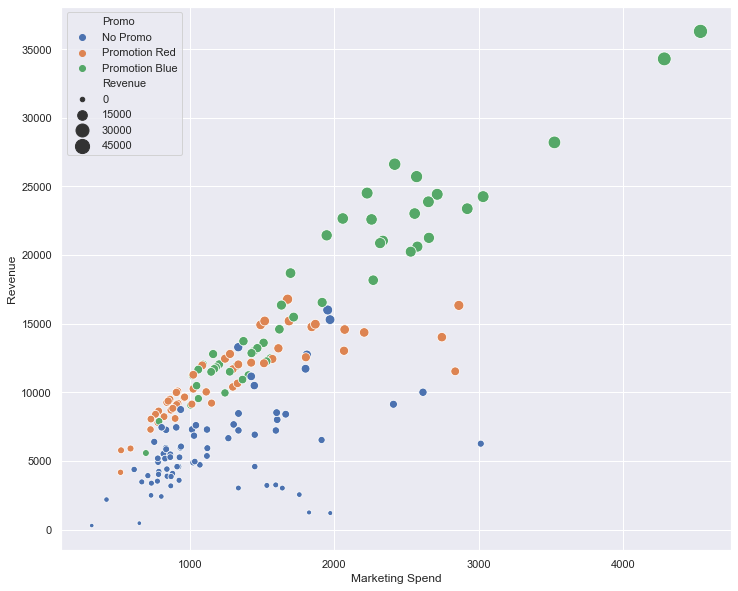

In [28]:
# Example 3 - Relationship between Marketing Spend and Revenue - changing color & hue - adding size

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green', hue = 'Promo', size = 'Revenue',
                    sizes=(20, 200))

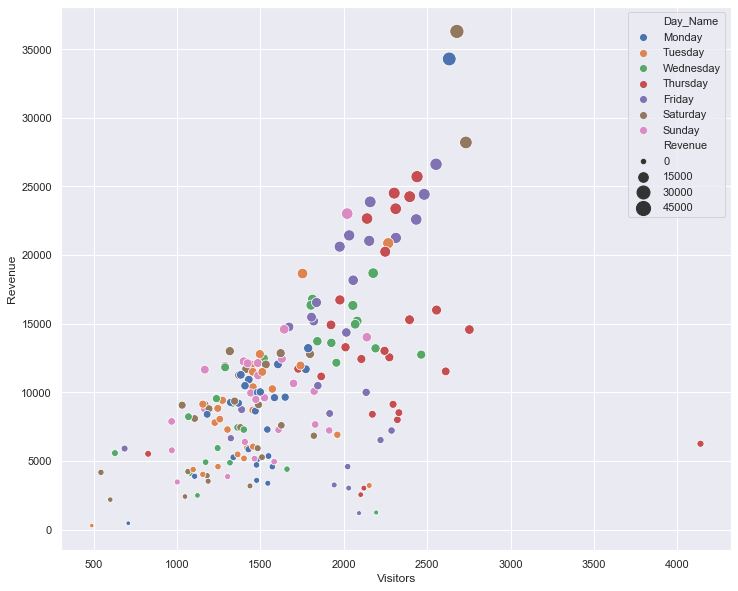

In [29]:
# Example 4 - Relationship between Marketing Spend and Revenue - changing color & hue - adding size - by day

ax = sns.scatterplot(x="Visitors", y="Revenue", data=raw_data, color = 'green', hue = 'Day_Name', size = 'Revenue',
                    sizes=(20, 200))

## 7. lmPlots

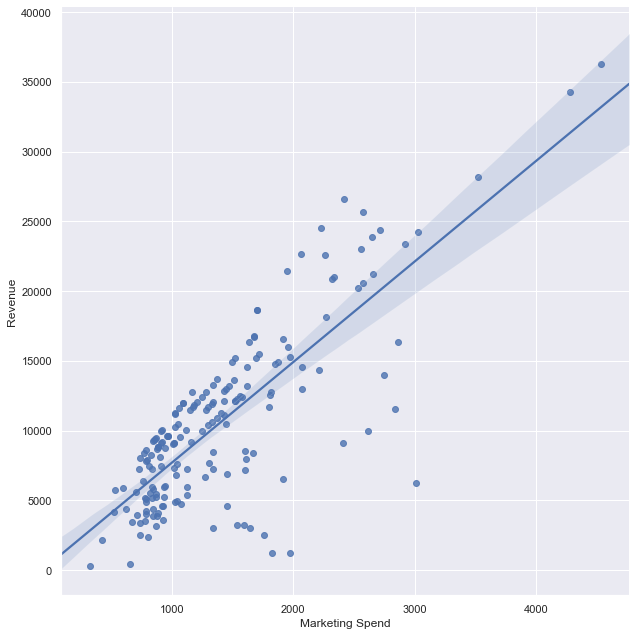

In [30]:
# Example 1 - Relationship between Marketing Spend and Revenue

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, height=9)

# Notes:
# What is Linear Regression: It is a predictive statistical method for modelling the relationship between x (independent variable) & y (dependent V).
# How it works (cost function MSE): https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

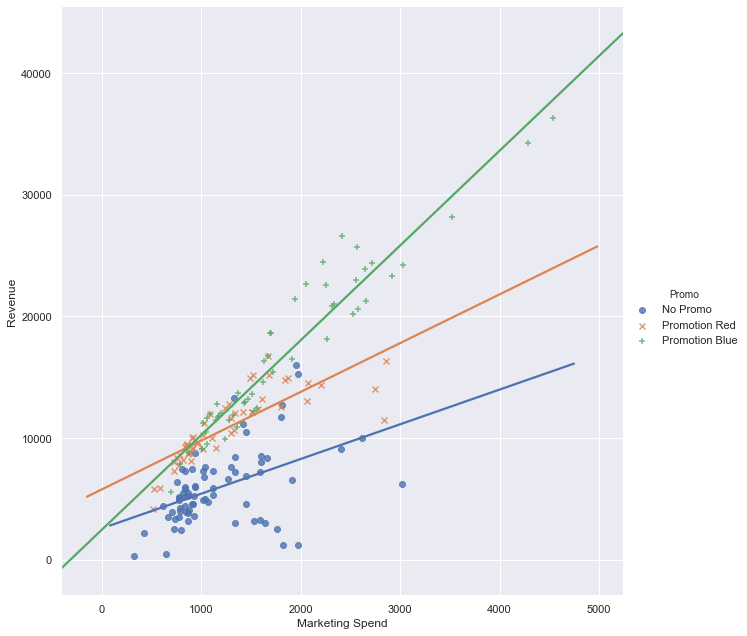

In [31]:
# Example 2 - Relationship between Marketing Spend and Revenue - changing color, hue & Style

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, hue = 'Promo', ci= False, height=9, markers=["o", "x", "+"])

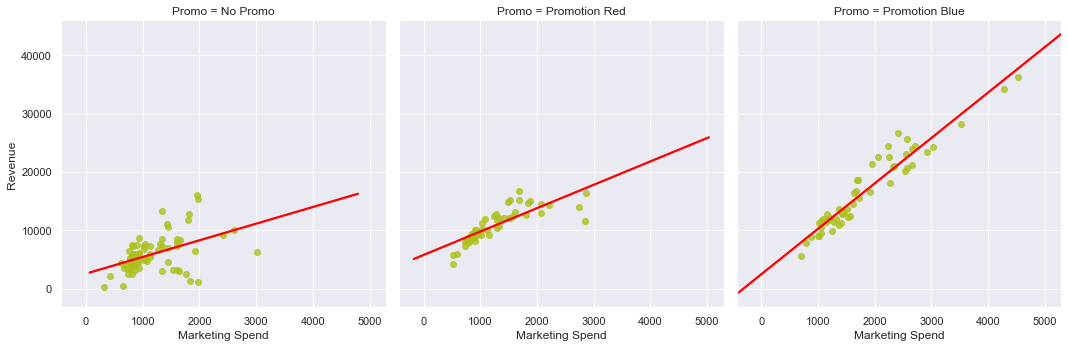

In [47]:
# Example 3 - Relationship between Marketing Spend and Revenue - by column

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, col = 'Promo', ci= False, height=5, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'#ADC11E'})

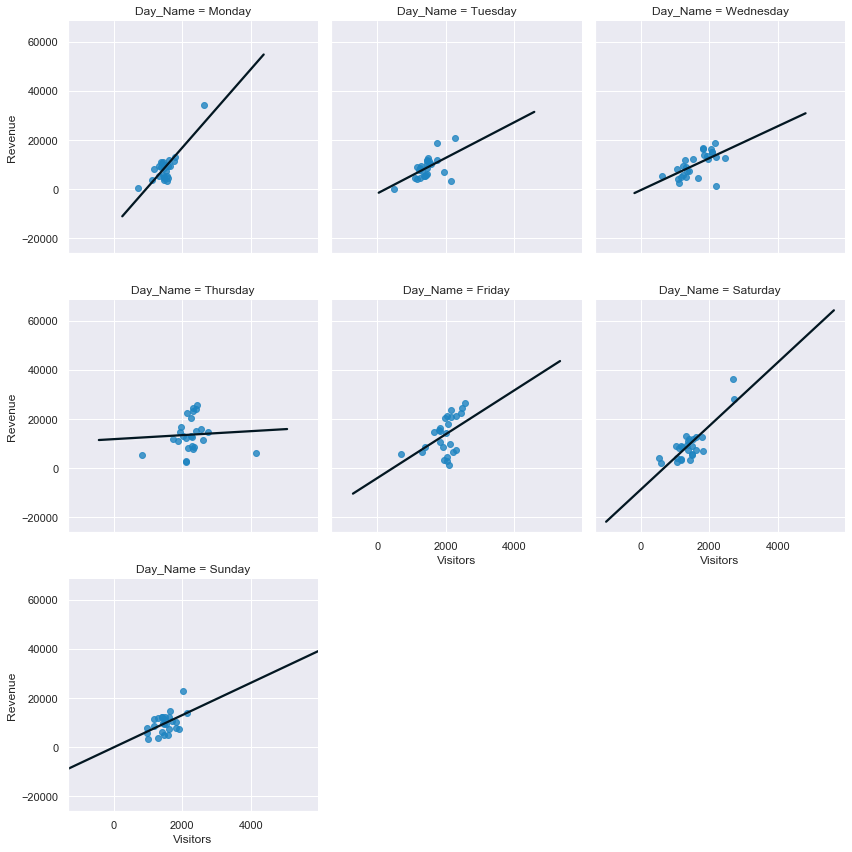

In [52]:
# Example 4 - Relationship between Marketing Spend and Revenue - by column - by day - add Jitter too

ax = sns.lmplot(x="Visitors", y="Revenue", data=raw_data, col = 'Day_Name', ci= False, height=4, 
                line_kws={'color': '#031722'}, 
                scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

## 8. SubPlots

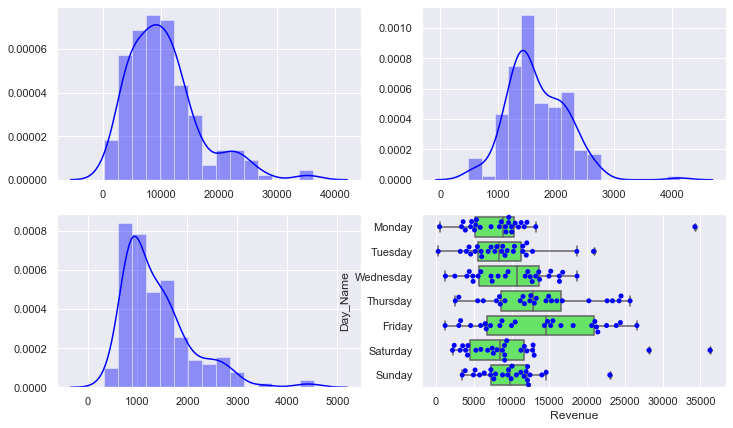

In [67]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

a = raw_data['Revenue'].values
b = raw_data['Visitors'].values
c = raw_data['Marketing Spend'].values


# plot 1
sns.distplot(a, color = 'blue', ax=axes[0,0])

# plot 2
sns.distplot(b, color = 'blue', ax=axes[0,1])

# plot 3
sns.distplot(c, color = 'blue', ax=axes[1,0])

# plot 4
sns.boxplot(x="Revenue", y="Day_Name", data=raw_data, color = '#52F954', ax=axes[1,1])
sns.swarmplot(x="Revenue", y="Day_Name", data=raw_data, color="blue", ax=axes[1,1])

## 9. Pairplots

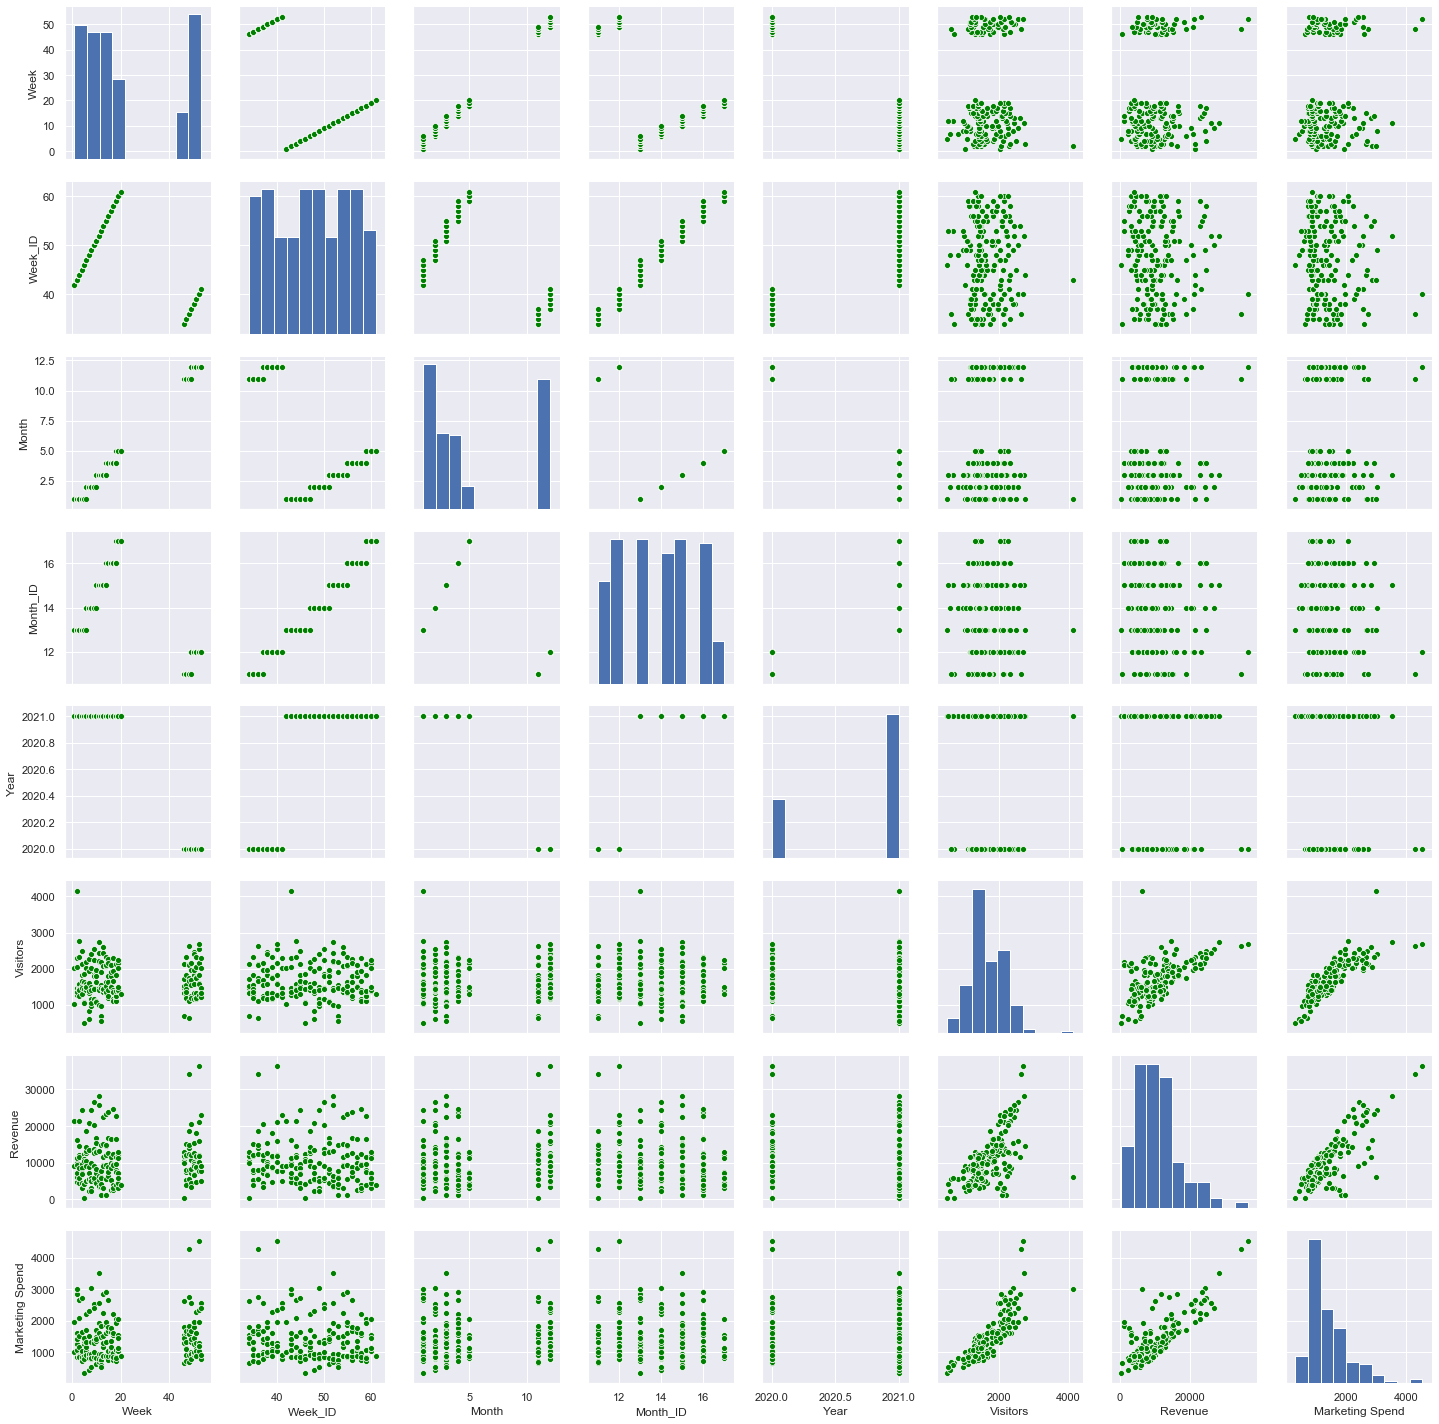

In [80]:
# Example 1 - running on all dataframe - green color
g = sns.pairplot(raw_data, plot_kws={'color':'green'})


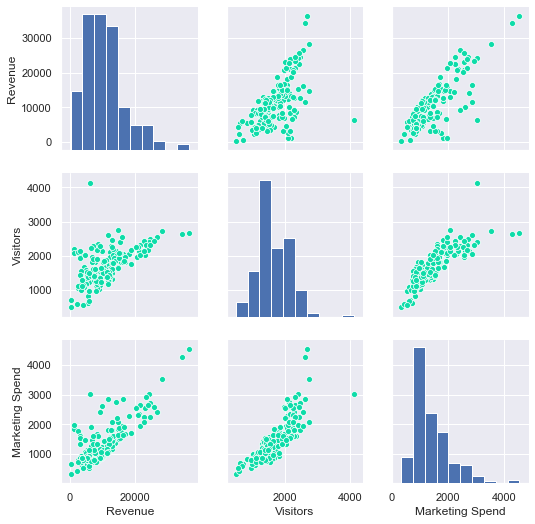

In [83]:
# Example 2 - running on specific columns - green color
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend']], plot_kws={'color':'#0EDCA9'})

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

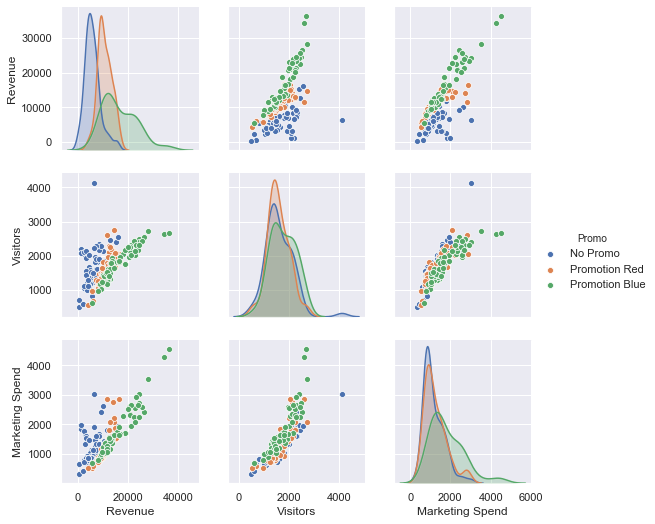

In [85]:
# Example 3 - running on specific columns - adding hue
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']], hue = 'Promo')


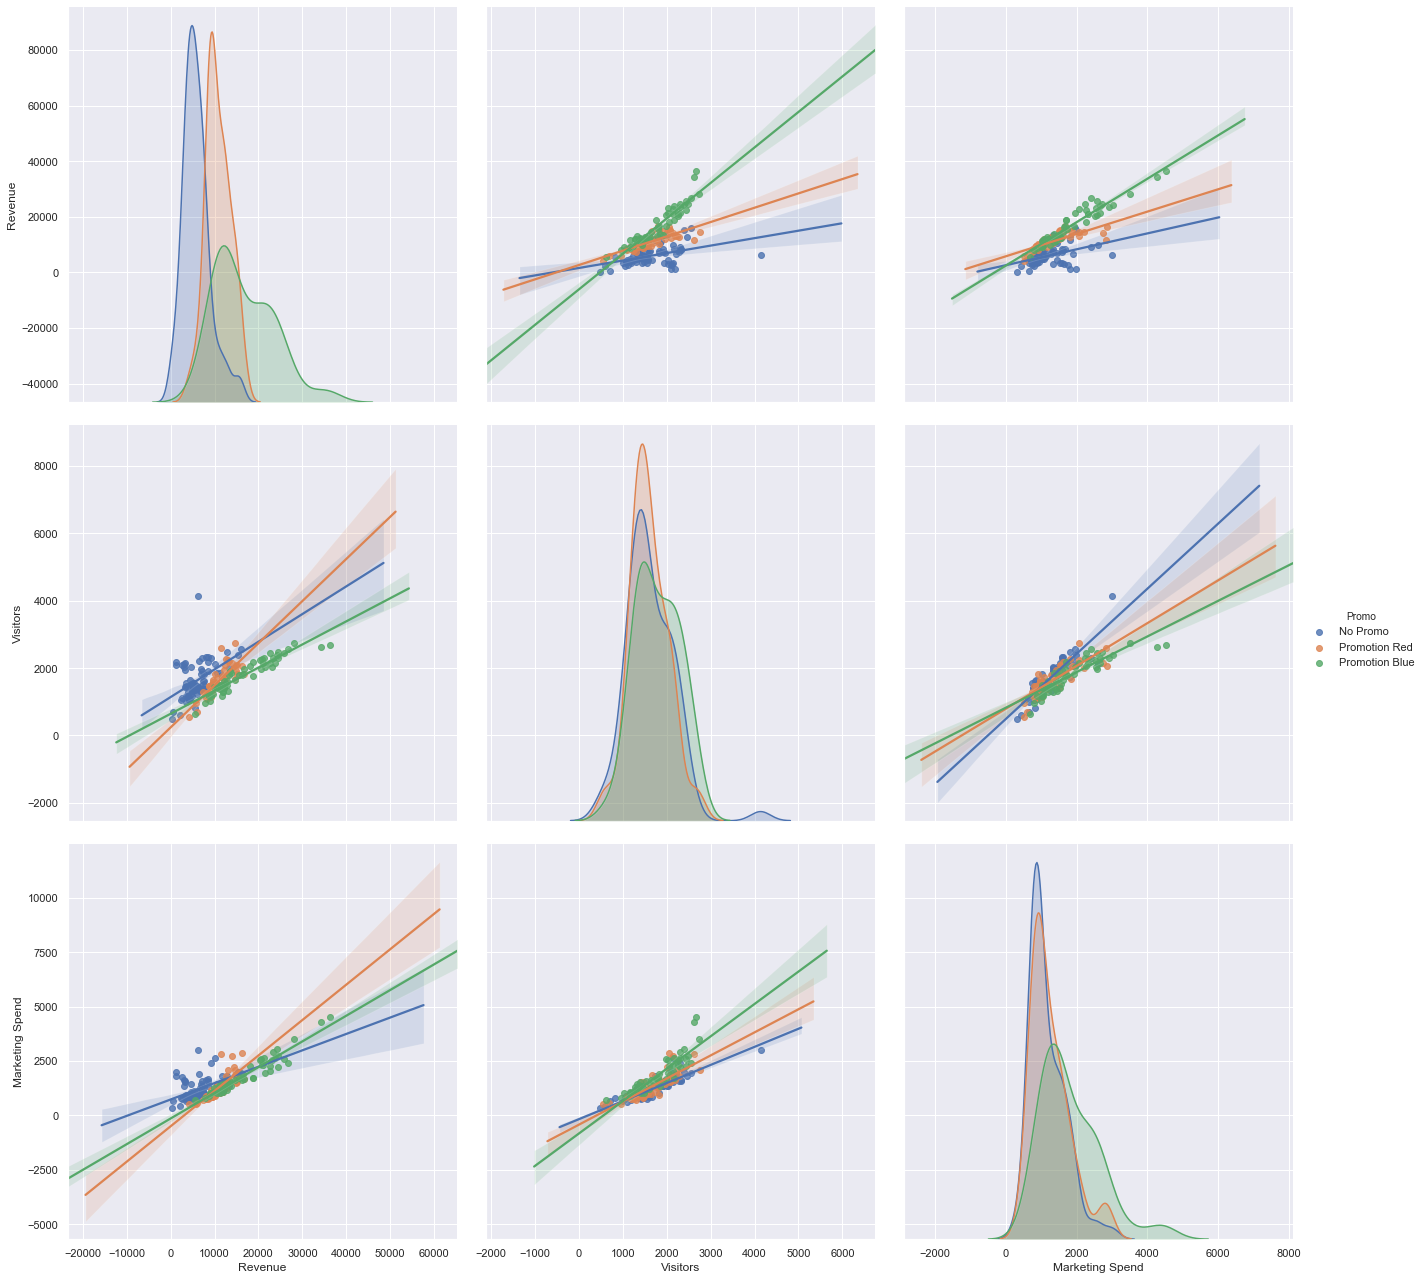

In [89]:
# Example 4 - running on specific columns - adding hue - adding kind = reg
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']], hue = 'Promo', kind="reg", size = 6)


### More on Pairplots:
https://seaborn.pydata.org/generated/seaborn.pairplot.html

## 10. JoinPlots
#### Draw a plot of two variables with bivariate and univariate graphs.

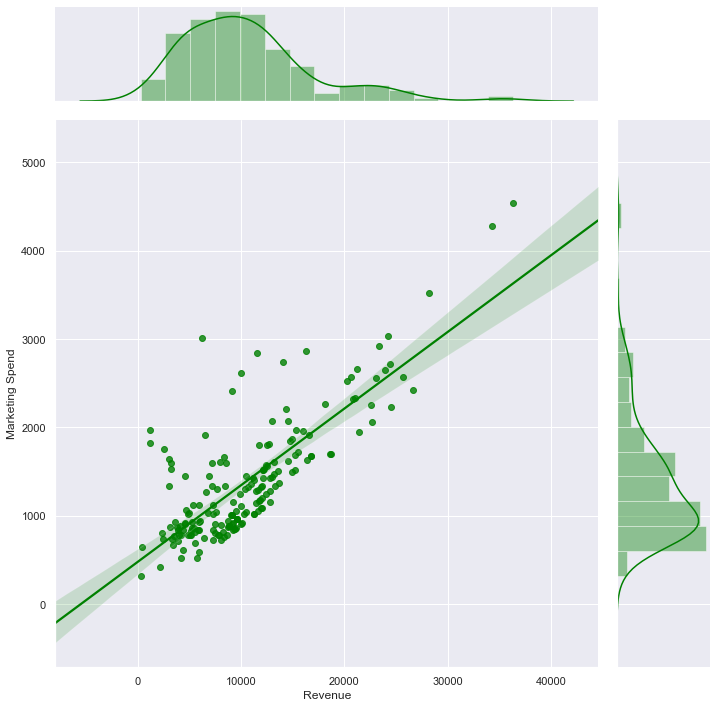

In [93]:
# Example 1 - Revenue vs marketing Spend Relationship with 
g = sns.jointplot("Revenue", "Marketing Spend", data=raw_data, kind="reg", color = 'green', size = 10)

## 11. Heat Map

In [ ]:
# First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
# .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
# The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
# More Info here: https://statisticsbyjim.com/basics/correlations/

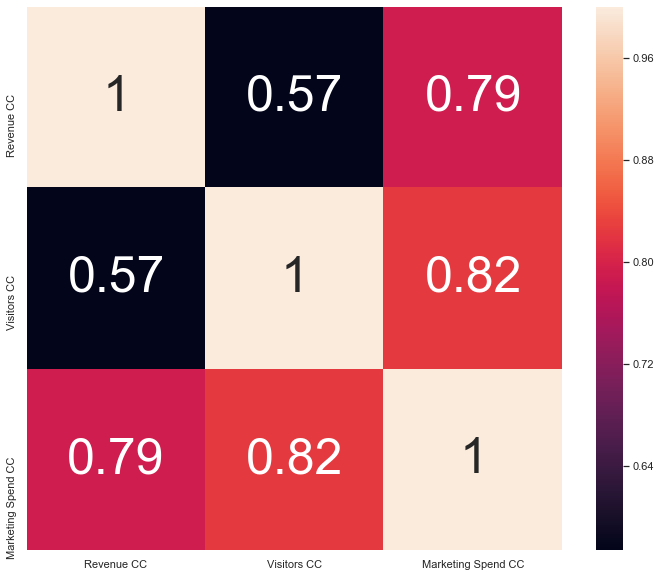

In [103]:
# Example 1 - Heatmap for PC

pc = raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']].corr(method ='pearson')

cols = ['Revenue CC','Visitors CC','Marketing Spend CC']

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50})


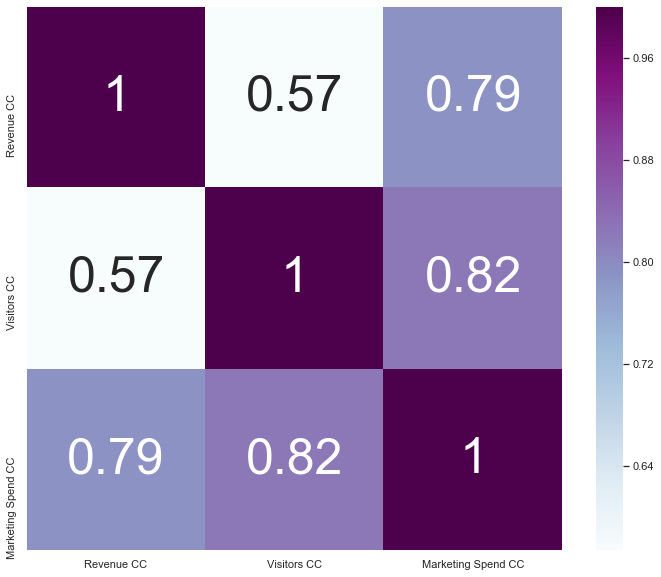

In [108]:
# Example 2 - Heatmap for PC - changing cmap

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50},
                 cmap="BuPu")

# Examples:
# cmap="YlGnBu"
# cmap="Blues"
# cmap="BuPu"
# cmap="Greens"

### More details for Heatmaps here:
https://seaborn.pydata.org/generated/seaborn.heatmap.html